# **Project Name**    -  **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised Clustering and Recommendation System
##### **Contribution**    - Individual


**BUSINESS PROBLEM OVERVIEW**


This is an Unsupervised Machine Learning project . This project analyzes Netflix’s global catalog using Exploratory Data Analysis (EDA) and unsupervised machine learning . The goal is to understand content patterns across countries, identify strategic trends (TV vs movies growth), and group similar content into meaningful clusters.
This analysis enables improved decision-making for content acquisition, marketing, and personalization.

Netflix, which currently boasts over 220 million subscribers as of 2022-Q2, have  approximately 7787 records and 11 attributes in the dataset. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

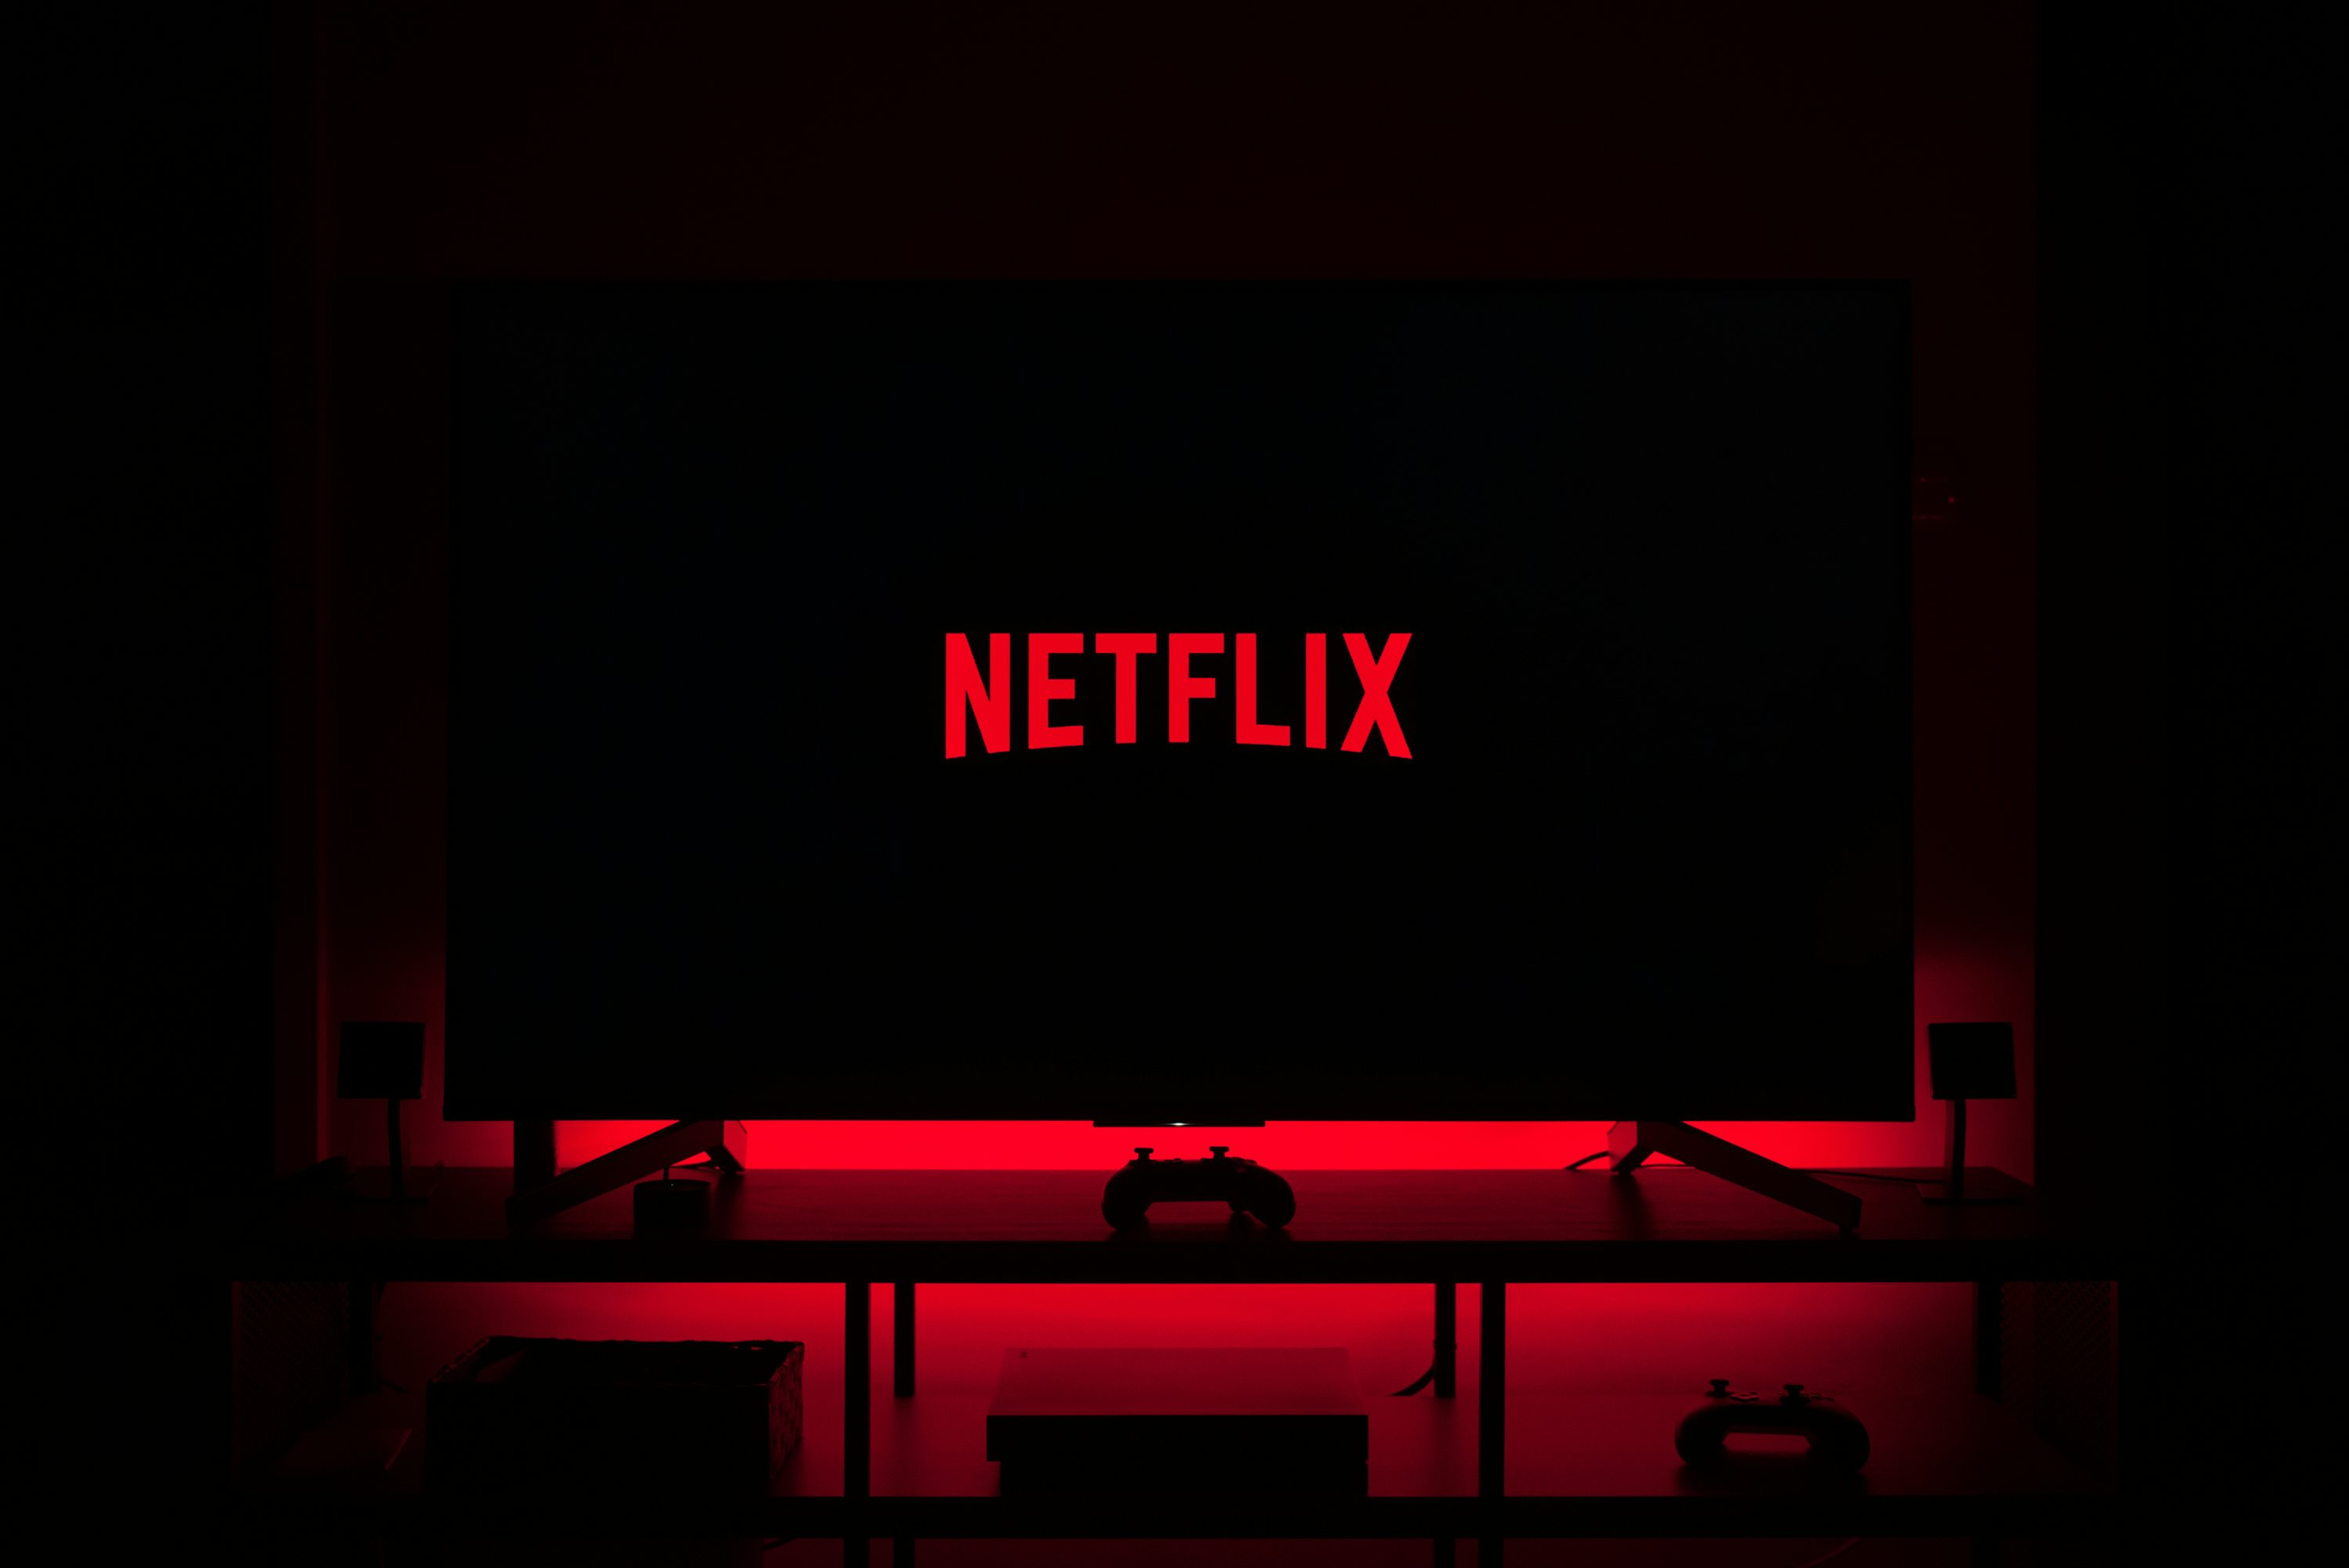


#### **Define Your Business Objective?**

1.**Prioritize content investments based on under-represented, high-interest clusters**

Example: If a region shows strong consumption of “crime series” but catalog supply is low, Netflix can:

Acquire similar titles, Produce local originals, Push dubbed versions

This directly boosts engagement.


2.**Build cluster-based personalization & marketing campaigns**

Clusters can act as “content personas.” Examples:

--> Auto-create home-page carousels like “Dark Mystery Dramas” for users aligned with that cluster.

Promote new releases to audiences that historically consume similar clusters.
This improves CTR, viewing time, and retention.

3.**Use cluster–country cross-analysis to guide localization strategy**

For each cluster: Identify high-potential countries , Prioritize dubbing/subtitling , Launch tailored social media campaigns
  
  -->This ensures maximum regional impact with minimal spend.


## **Know Your Data**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from pathlib import Path

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/Netflix Data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [ ]:
# Dataset First View
df.head()

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [ ]:
# Dataset Information
df.info()

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
df['type'].value_counts()

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), cmap = 'coolwarm')

### **What did you know about your dataset?**

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts and  to understand trends, audience preferences, and content strategy.

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

## **Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all').T
# .T = Make the output table easier to read by flipping it.

# **Check Unique Values for each variable.**



In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


###  **Variables Description**

* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description :** The Summary description

# **Data cleaning & preprocessing**

In [ ]:
import ast
import pandas as pd

def to_list_col(x):
    # If it's already a list, return it directly
    if isinstance(x, list):
        return x

    x_str = str(x).strip()

    # Handle empty / null values
    if x_str == '' or x_str.lower() in ['nan', 'none']:
        return []

    # Only try literal_eval if it looks like a list/tuple
    if x_str.startswith('[') and x_str.endswith(']') or x_str.startswith('(') and x_str.endswith(')'):
        try:
            evaluated = ast.literal_eval(x_str)
            if isinstance(evaluated, (list, tuple)):
                return list(evaluated)
        except:
            pass # Fallback to splitting if literal_eval fails or returns non-list/tuple

    # Fallback: split by commas, and wrap single items in a list
    return [item.strip() for item in x_str.split(',') if item.strip()]



df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df

# **Some useful features to create:**

num_genres = len(genres_list)

num_countries = len(production_countries_list)

has_big_cast = imdb_votes > some threshold

is_show = show_type == 'SHOW'

year_bucket = group release_year into: <2000, 2000-2009, 2010-2014, 2015-2019, 2020+

In [ ]:
df['num_genres'] = df['listed_in'].apply(to_list_col).apply(len)
df['num_countries'] = df['country'].apply(to_list_col).apply(len)
df['is_show'] = df['type'].str.lower().eq('tv show') | df['type'].str.lower().eq('show')
df['year_bucket'] = pd.cut(df['release_year'],
                               bins=[0,1999,2009,2014,2019, 2100],

                               labels=['<2000','2000-2009','2010-2014','2015-2019','2020+'])
df

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

 **The most frequent actors in the dataset. Assumes the dataset has a 'cast'  column with comma-separated actor names.**
    

In [ ]:
def plot_top_actors(df, top_n=20):
    # Drop missing cast entries
    df_cast = df.dropna(subset=['cast']).copy()

    # Split comma-separated names and explode into individual rows
    df_cast['actor'] = df_cast['cast'].apply(lambda x: [a.strip() for a in x.split(',')])
    exploded = df_cast.explode('actor')

    # Count frequencies
    actor_counts = exploded['actor'].value_counts().head(top_n)
    return actor_counts # Return the actor_counts Series

top_n = 20 # Define top_n for consistent use
actor_counts = plot_top_actors(df, top_n)
print(actor_counts)


actor
Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       30
Om Puri                30
Takahiro Sakurai       29
Akshay Kumar           29
Amitabh Bachchan       27
Boman Irani            27
Yuki Kaji              27
Paresh Rawal           27
Kareena Kapoor         25
Andrea Libman          24
Vincent Tong           24
John Cleese            24
Tara Strong            22
Ashleigh Ball          22
Nawazuddin Siddiqui    21
Ajay Devgn             21
Nicolas Cage           20
Daisuke Ono            20
Name: count, dtype: int64


## **Total Number Of Directors**

In [ ]:
print(f"Number of Movies directed by directors are : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : { df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


# **Exploratory Data Analysis — visualizations**

# **Distribution of titles by show_type**

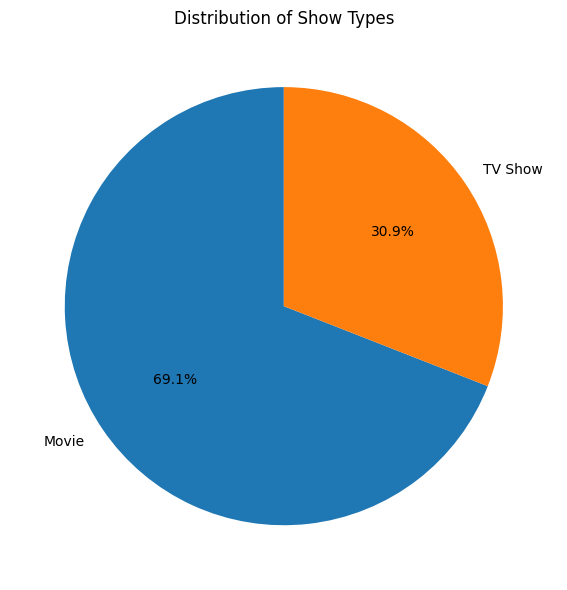

In [ ]:
# Count values
type_counts = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Show Types")
plt.tight_layout()
plt.show()


# **Top 20 genres (explode genres and count)**

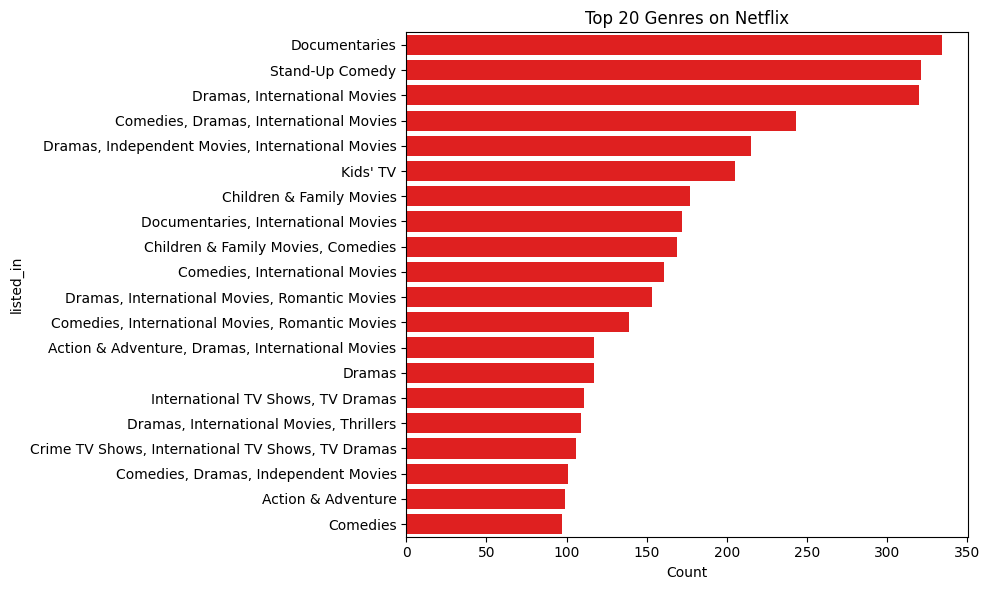

In [ ]:
genres_exploded = df.explode('listed_in')
top_genres = genres_exploded['listed_in'].value_counts().nlargest(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index , color='red')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.tight_layout()


# **Time-series: movies vs tv shows by year**

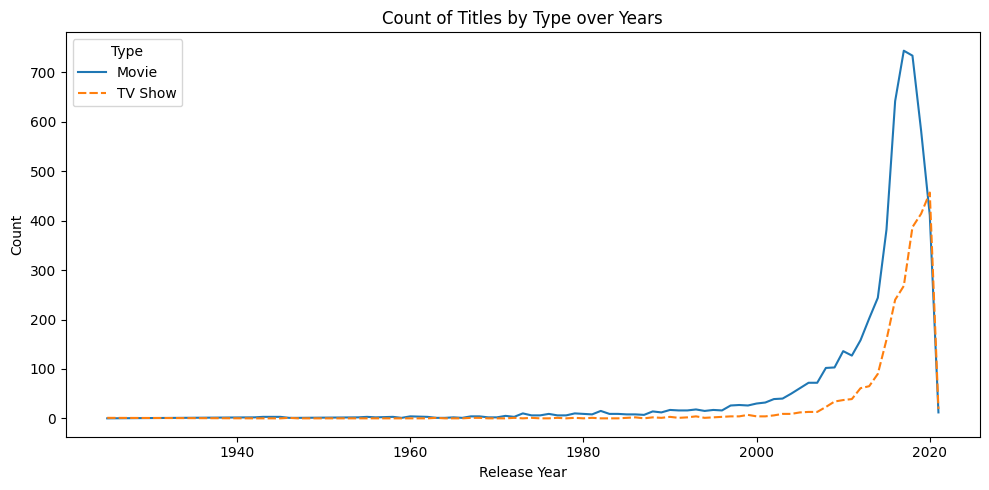

In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')
df2 = df.dropna(subset=['release_year', 'type']).copy()
counts = df2.groupby(['release_year', 'type']).size().unstack(fill_value=0)
counts = counts.sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=counts)
plt.title("Count of Titles by Type over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

# **Distribution of Ratings**

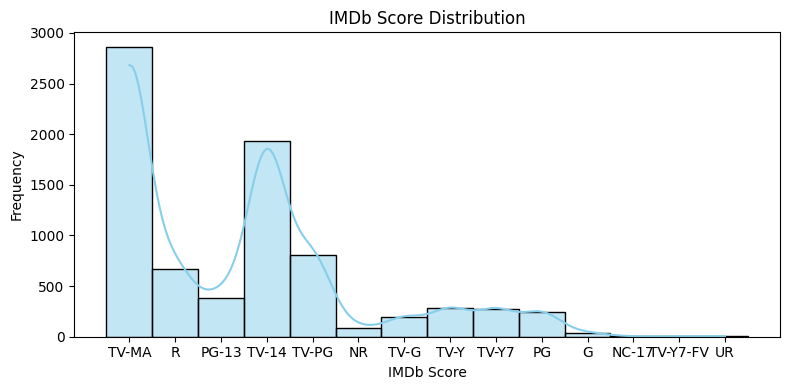

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(
    df['rating'].dropna(),
    bins=30,
    kde=True,
    color='skyblue'
)
plt.title('IMDb Score Distribution')
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# **Top countries by number of titles**


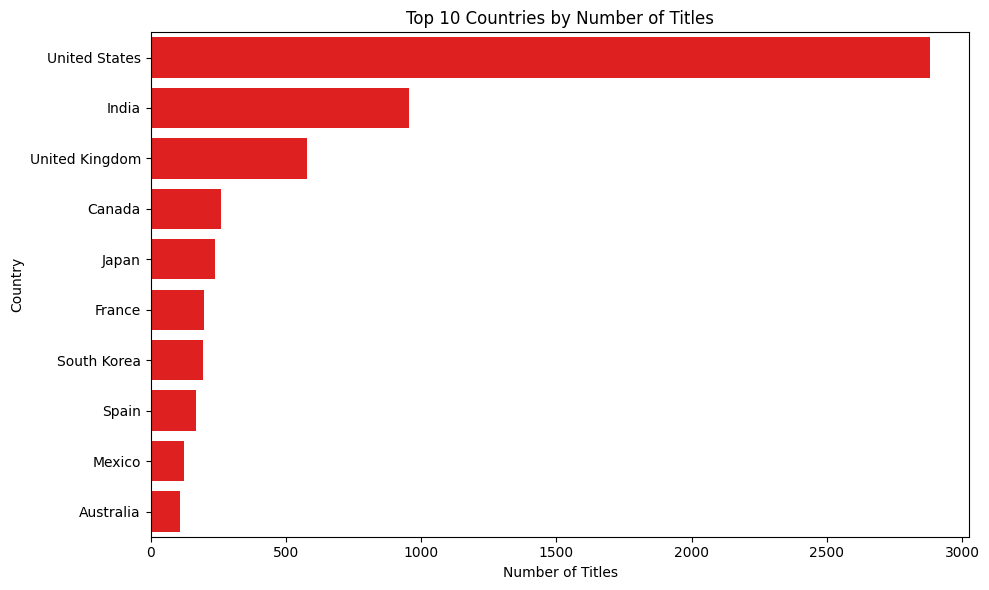

In [ ]:
top_n = 10
dfc = df.dropna(subset=['country']).copy()
dfc['country_first'] = dfc['country'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) and x.strip() else "Unknown")
top = dfc['country_first'].value_counts().head(top_n)
plt.figure(figsize=(10,6))
sns.barplot(x=top.values, y=top.index, color='red')
plt.title(f"Top {top_n} Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()

# **Most Frequent Actors on Netflix**

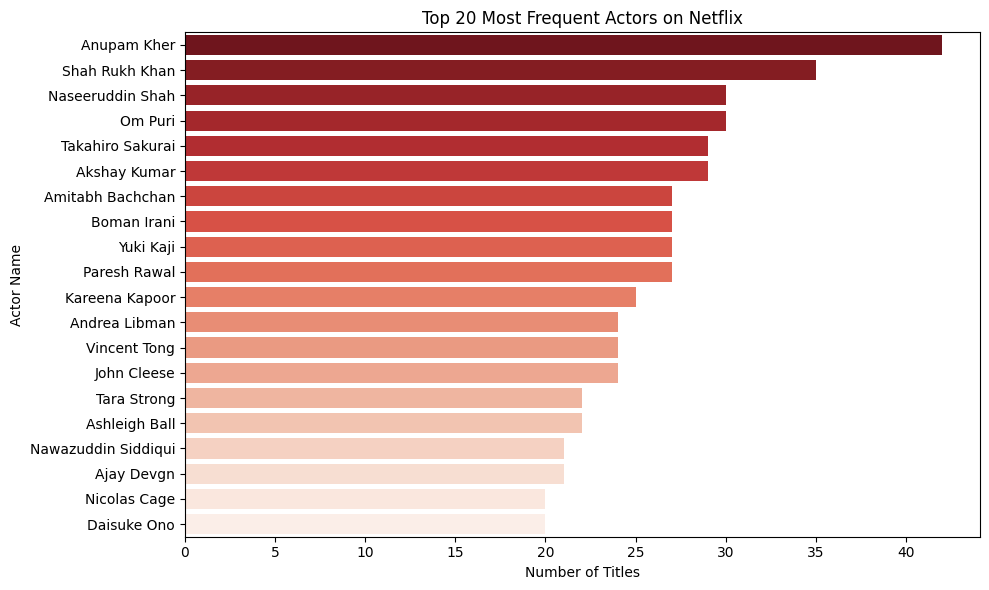

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="Reds_r")
plt.title(f"Top {top_n} Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor Name")
plt.tight_layout()
plt.show()

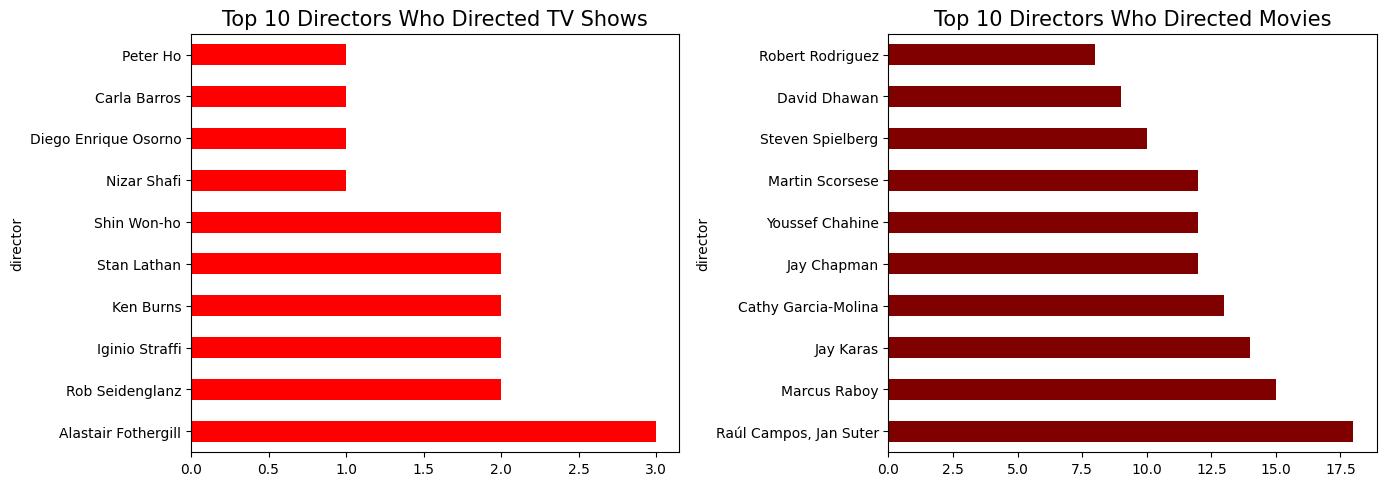

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 directors who directed TV Shows (Crimson)
df[df['type']=='TV Show']['director'].value_counts()[:10].plot(
    kind='barh',
    ax=ax[0],
    color="red"
)
ax[0].set_title('Top 10 Directors Who Directed TV Shows', size=15)

# Top 10 directors who directed Movies (Maroon)
df[df['type']=='Movie']['director'].value_counts()[:10].plot(
    kind='barh',
    ax=ax[1],
    color='maroon'
)
ax[1].set_title('Top 10 Directors Who Directed Movies', size=15)

plt.tight_layout(pad=1.2)
plt.show()


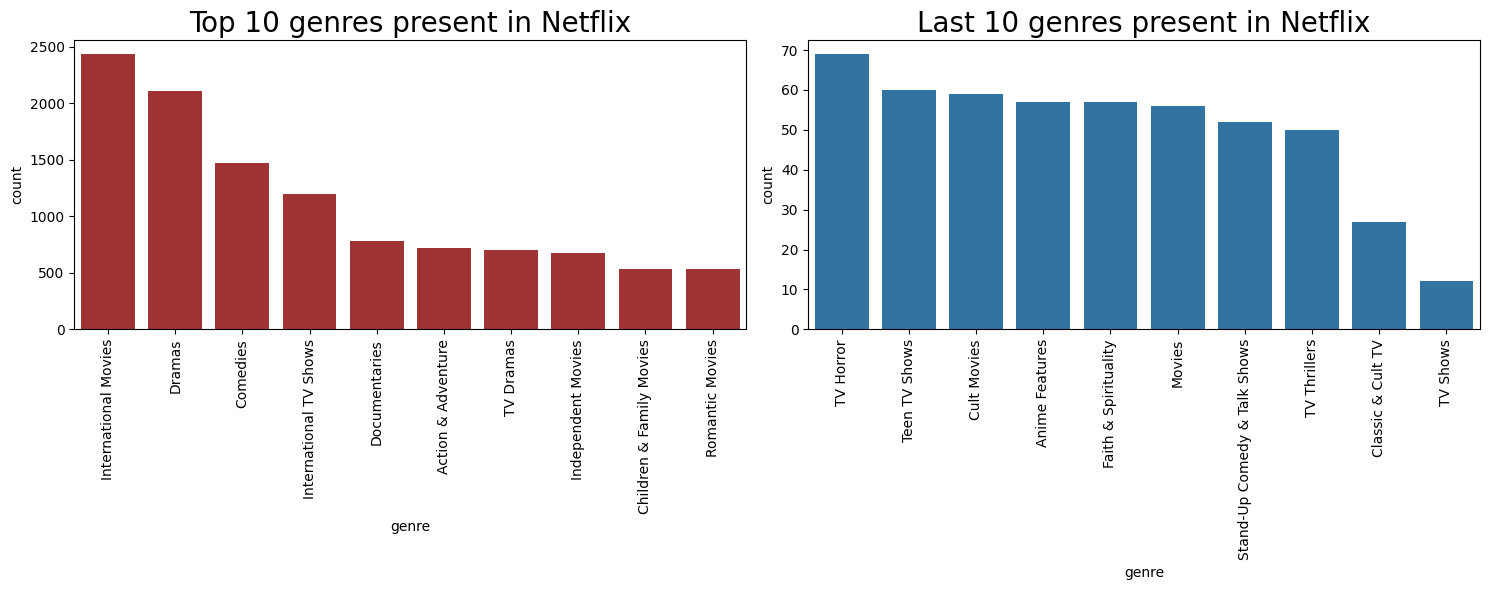

In [ ]:

fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0],color='firebrick')
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# **Handling Missing Values**

In [ ]:
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
df.isna().sum()

### **Handling Outliers**

<Axes: >

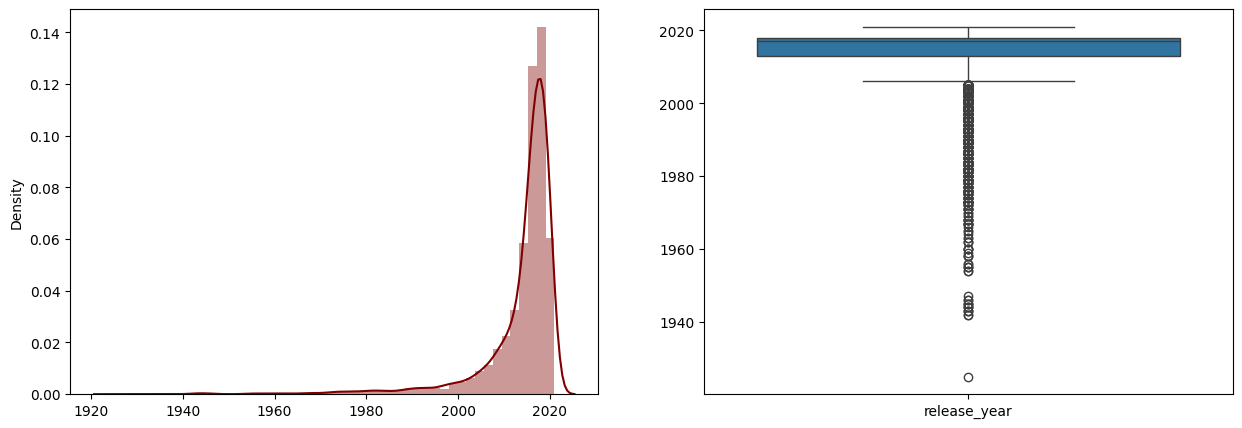

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0] , color='maroon')
sns.boxplot(data=df, ax=ax[1])


###**Data Preprocessing**

# **What is Data PreProcessing ?**

* Data preprocessing in machine learning is the step where raw data is cleaned, transformed, and organized so that algorithms can learn from it effectively. It directly affects how accurate, stable, and generalizable your final model will be.


*   The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers









#### **Modeling Approach**
1.   Choose the attributes that you want to cluster.
2.   Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
3.   Stemming or Lemmatization: Normalizing the words by reducing them to their base form.
4.   Tokenization: Breaking the text into smaller units, such as sentences or words.
5.   Dimensionality reduction.
6.   Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
7.   Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

### **Selecting Attributes**

In [ ]:
df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [ ]:
# creating tags column using all text column which one is used for model building purpose.
df['new_data'] = df[['director','cast','country','rating','listed_in','description']].fillna("").agg(" ".join, axis=1)


In [ ]:
df['new_data'][0]


' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil TV-MA International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* We were able to successfully consolidate all of the required data into a single column.

### **Removing Stop words and Lower Casing.**

Removing stop words and lower casing are basic text‑cleaning steps in NLP that simplify text before feeding it to models. They help reduce noise and the size of the vocabulary so algorithms focus on more informative tokens.

**Removing stop word**

Removing stop words means deleting very common words (like “the”, “is”, “and”, “in”) that usually do not add much meaning for tasks such as topic modeling, document classification, or search. A predefined “stop‑word list” (or a custom one) is used, and any token that appears in that list is dropped from the text.

**Lower casing**

Lower casing (case normalization) means converting all characters in the text to lowercase, so “Apple”, “APPLE”, and “apple” are treated as the same token. This reduces duplicate entries in the vocabulary and makes frequency counts and embeddings more consistent, which usually improves model robustness.

In [ ]:
import nltk
nltk.download('stopwords', quiet=True)

# create a set of English stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [ ]:
def stopwords(text):
    # Handle NaN or non-string values
    if not isinstance(text, str):
        return ""

    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)


In [ ]:
# applying stopwords function.
df['new_data']= df['new_data'].apply(stopwords)

In [ ]:
# checking the first row again
df['new_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil tv-ma international tv shows, tv dramas, tv sci-fi & fantasy future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

* We have successfully changed the corpus to lowercase and removed all stopwords.

### **Removing Punctuations**

* The process of removing punctuations involves eliminating characters like commas, periods, exclamation points, question marks, and other symbols that do not add semantic value to the text. This step simplifies text by reducing noise and the number of unique tokens, which helps improve model performance.


*   The process typically follows these steps:

  1. Identify all punctuation symbols (e.g., !"#$%&'()*+,-./:;<=>?@[\]^_{|}~).

 2. Replace or remove these punctuation characters from the text. Often, punctuation is replaced with a space to prevent words from concatenating.

  3. Use tools such as Python's string.punctuation to get a list of punctuation characters and functions like str.translate() with a translation table (str.maketrans) to efficiently remove them.





In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# applying remove_punctuation function
df['new_data'] = df['new_data'].apply(remove_punctuation)

In [ ]:
# checking the first row after the process
df['new_data'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma international tv shows tv dramas tv scifi  fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

### **Stemming**



Stemming is the process of reducing words to their root or base form, called the "stem," which may not always be a valid word. For example, "arguing," "argued," and "argues" might all be reduced to "argu." This is typically done by removing common suffixes to group different variations of the same word together, helping machines treat them as a single entity. Stemming simplifies text data by reducing the number of unique words, which improves the efficiency and accuracy of NLP tasks like text classification, information retrieval, and sentiment analysis.

The stemming process uses a set of language rules to strip suffixes from words quickly and computationally inexpensively. Despite sometimes producing stems that aren't proper words, stemming improves model performance by reducing data dimensionality, speeding up training, and simplifying downstream tasks like feature extraction. It differs from lemmatization, which produces valid dictionary words through more complex linguistic analysis.

* We will utilize **SnowballStemmer** to construct a meaningful word from a word corpus.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# appying stemming function
df['new_data'] = df['new_data'].apply(stemming)

In [ ]:
# checking the first row after the process
df['new_data'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

### **Text Vectorization**

Text vectorization is the process of transforming textual data into numerical format, enabling machine learning models to interpret and work with language effectively. It converts words, sentences, or documents into vectors—mathematical representations—that capture semantic and syntactic properties.There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
* IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
* The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['new_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary))
#number of independet features created from "text_data" columns

10000


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['new_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7787, 10000)
datatype : <class 'numpy.ndarray'>


### **Dimensionality Reduction**

* Dimensionality reduction in the context of text vectorization and NLP is the process of reducing the number of features or dimensions in the vector representations of text data while retaining the most important information. This is crucial because text vectorization often creates very high-dimensional data due to the large vocabulary size or complex embeddings, which can lead to increased computation time, memory use, and risk of overfitting.

* Why Dimensionality Reduction is Important

 1. Reduces computational complexity and speeds up machine learning algorithms.

2. Helps in removing noise and redundant features, improving model performance.

3. Makes it easier to visualize and interpret data.

4. Mitigates the curse of dimensionality by simplifying the structure of the data.

* Common Techniques -:

     * Principal Component Analysis (PCA): Projects data into a lower-dimensional space by maximizing variance.

     * Singular Value Decomposition (SVD): Often used with techniques like Latent Semantic Analysis to reduce dimensionality in text features.

     * Autoencoders: Neural network-based approaches to learn efficient latent representations.

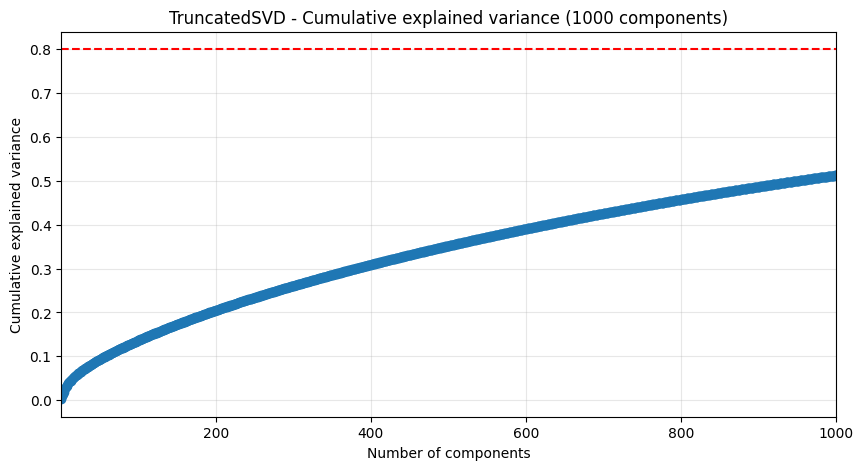

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

# choose how many components you want to compute & plot
# careful: large n_components can be slow / memory heavy
n_components = 1000  # set to desired "full" amount (e.g., 1000 or 3000)

# sanity clamp to possible maximum
n_samples, n_features = vector.shape
max_possible = min(n_samples, n_features) - 1
n_components = min(n_components, max_possible)

svd = TruncatedSVD(n_components=n_components, random_state=42)
svd.fit(vector)   # may take time for very large n_components

evr = svd.explained_variance_ratio_
cum_evr = np.cumsum(evr)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(evr)+1), cum_evr, marker='o', linewidth=1)
plt.title(f'TruncatedSVD - Cumulative explained variance ({len(evr)} components)')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.xlim(1, len(evr))
plt.grid(alpha=0.3)
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7787, 3000)

## **Model Implementation**

### K-Means Clustering

*   K-means clustering is an unsupervised machine learning algorithm used to group data points into a specified number (k) of clusters. It works by iteratively assigning each data point to the cluster with the nearest centroid (the mean point of the cluster) and then recalculating the centroids based on the current members of each cluster. The goal of the algorithm is to minimize the sum of squared distances between data points and their respective cluster centroids, resulting in clusters where data points are more similar to each other than to points in different clusters. This process continues until the cluster assignments stop changing or a set number of iterations is reached. K-means is efficient, scales well for large datasets, and is widely used in tasks like customer segmentation, image compression, and anomaly detection



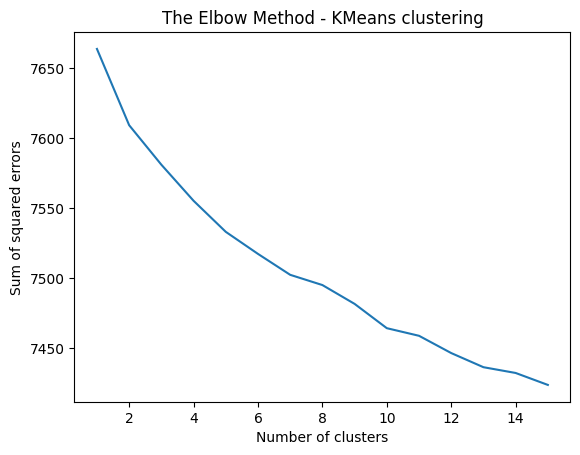

In [ ]:
from sklearn.cluster import KMeans

'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

X = vector  # Use the preprocessed 'vector' data as input for KMeans

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

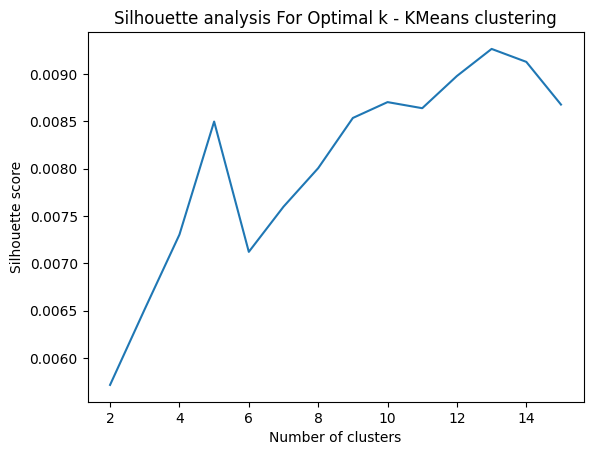

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 6 clusters.
* Building 6 clusters using the k-means clustering algorithm.

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(7527.370577780107, np.float64(0.006372210169675128))


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                                   title       director  \
6585  Movie            The Legend of Michael Mishra     Manish Jha   
3318  Movie            Katherine Ryan: Glitter Room  Linda Mendoza   
551   Movie  Anthony Jeselnik: Thoughts and Prayers     Adam Dubin   
506   Movie                       Andaleeb El Dokki     Wael Ehsan   
2060  Movie                            Exes Baggage   Dan Villegas   

                                                   cast        country rating  \
6585  Arshad Warsi, Aditi Rao Hydari, Kayoze Irani, ...          India  TV-14   
3318                                     Katherine Ryan  United States  TV-MA   
551                                    Anthony Jeselnik  United States  TV-MA   
506   Mohamed Henedi, Heba Nour, Dawood Hussain, Amr...          Egypt  TV-14   
2060  Angelica Panganiban, Carlo Aquino, Dionne Mons...    Philippines  TV-MA   

                                          listed_in  \
6585         Comedies, Dramas, International Movies   
3318                                Stand-Up Comedy   
551                                 Stand-Up Comedy   
506                  Comedies, International Movies   
2060  Dramas, International Movies, Romantic Movies   

                                            description  kmeans_cluster  
6585  After a life of crime, a notorious kidnapper t...               0  
3318  Fresh from a tour, comedian Katherine Ryan sha...               4  
551   There's no subject too dark as the comedian sk...               4  
506   Aiming for fame, a struggling singer finds his...               0  
2060  After years apart, a former couple reunites an...               0

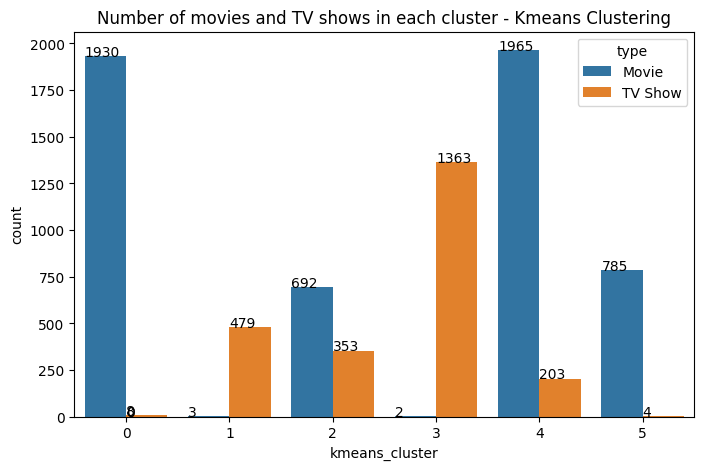

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* **Successfully built 6 clusters using the k-means clustering algorithm.**

#### **Building wordclouds for different clusters in K-Means Clustering**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "description" column for different cluster**

cluster 0


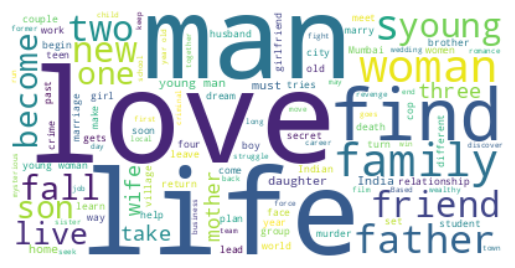

cluster 1


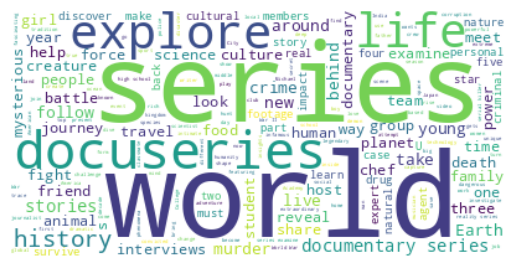

cluster 2


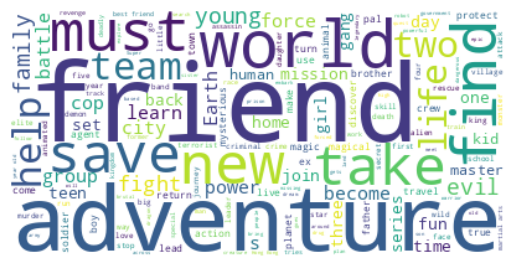

cluster 3


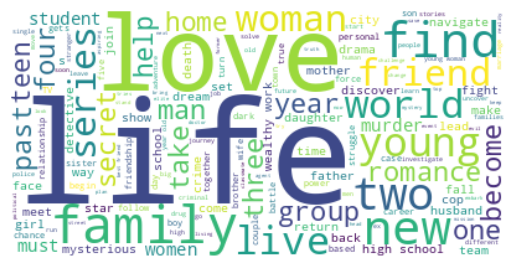

cluster 4


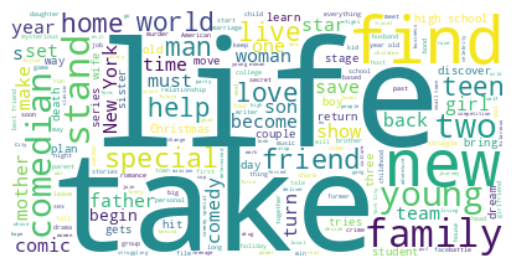

cluster 5


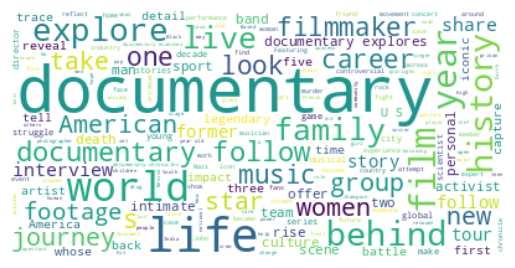

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

cluster 0


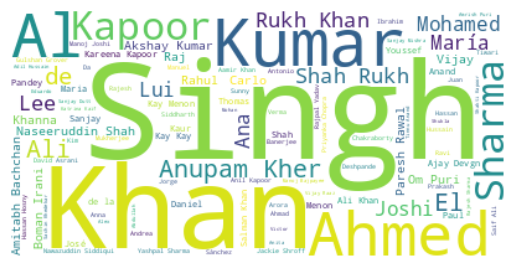

cluster 1


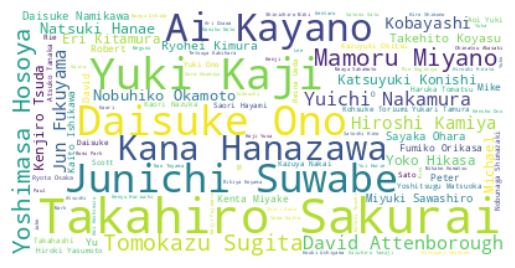

cluster 2


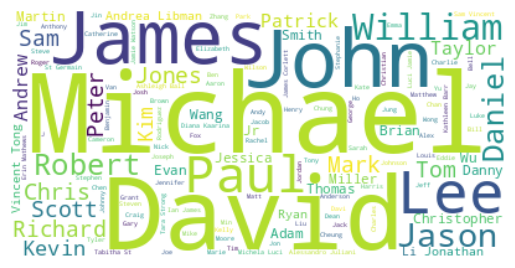

cluster 3


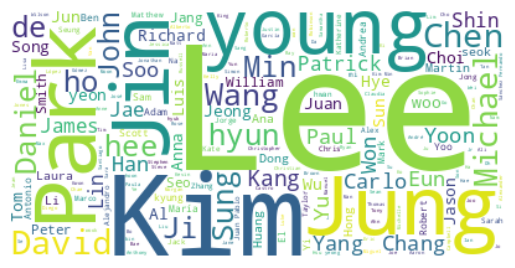

cluster 4


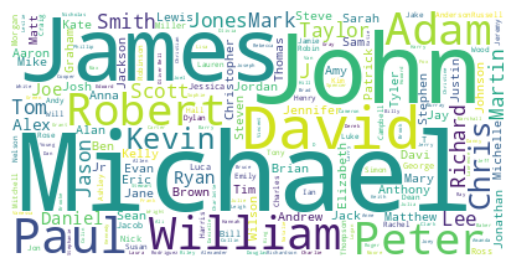

cluster 5


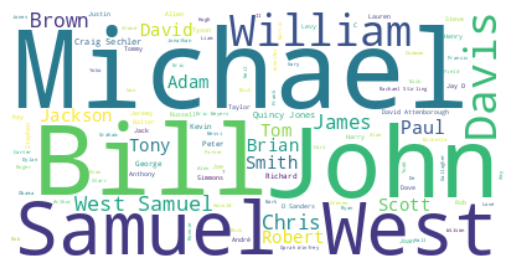

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

**Word Cloud on "listed_in" (genre) col for different cluster**

cluster 0


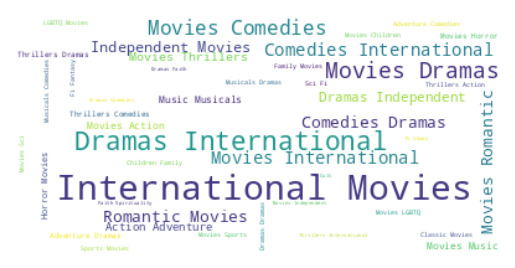

cluster 1


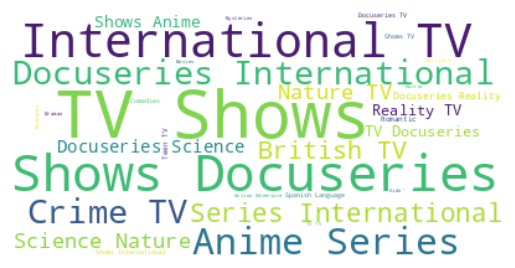

cluster 2


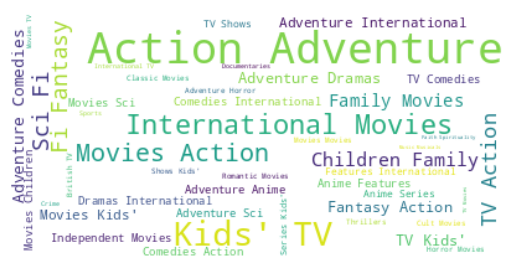

cluster 3


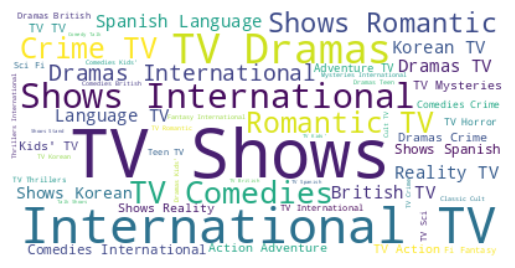

cluster 4


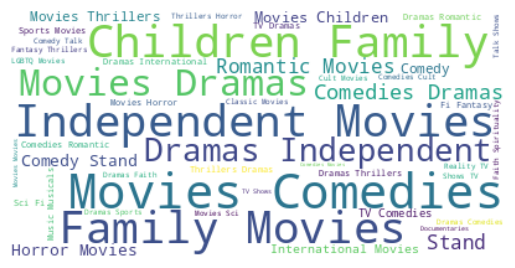

cluster 5


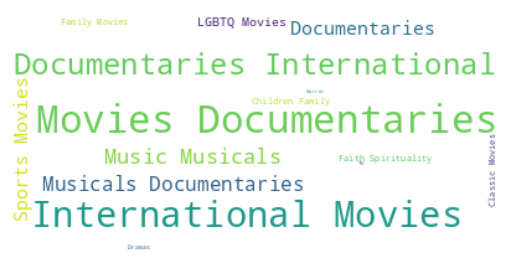

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

**Word Cloud on "country" column column for different cluster**

cluster 0


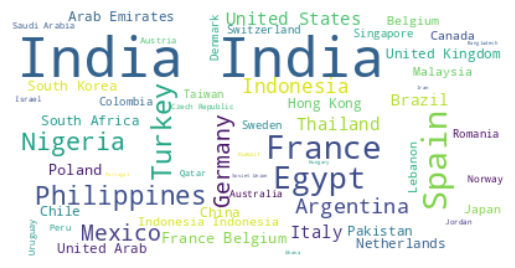

cluster 1


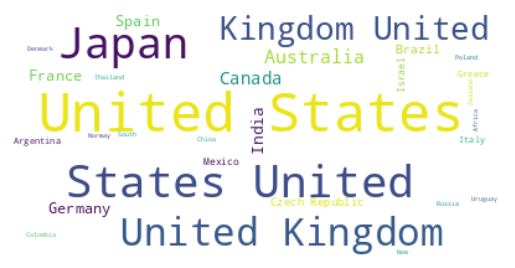

cluster 2


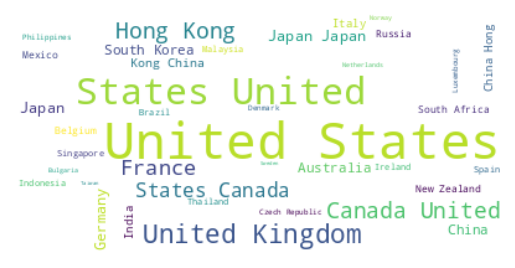

cluster 3


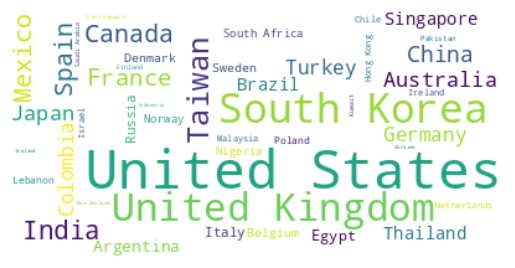

cluster 4


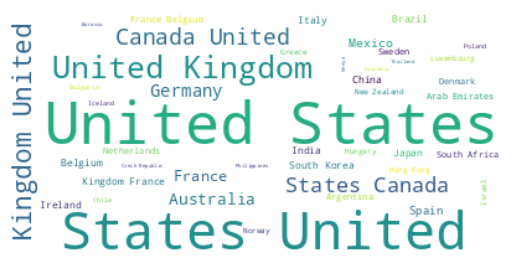

cluster 5


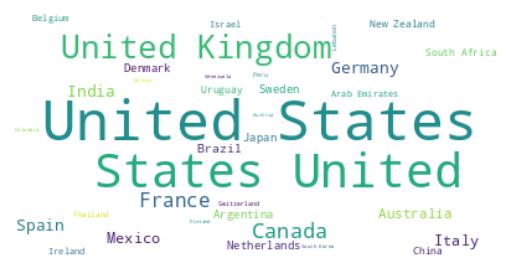

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

**Word Cloud on "title" column column for different cluster**

cluster 0


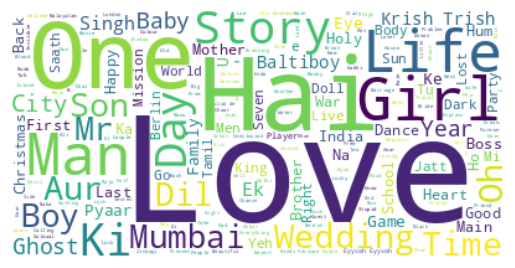

cluster 1


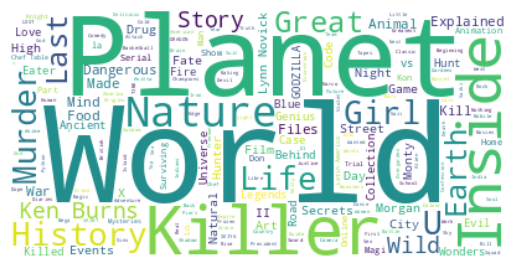

cluster 2


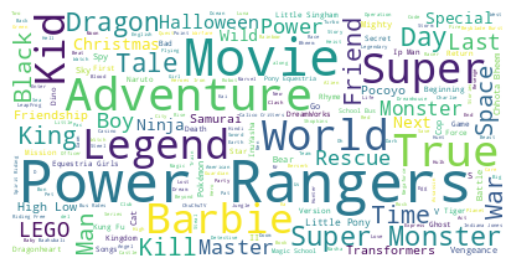

cluster 3


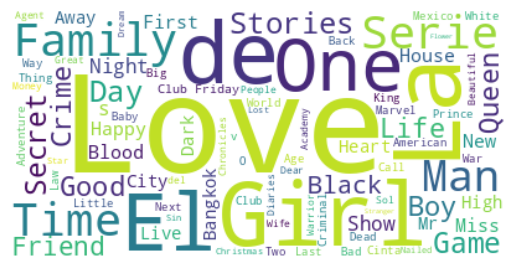

cluster 4


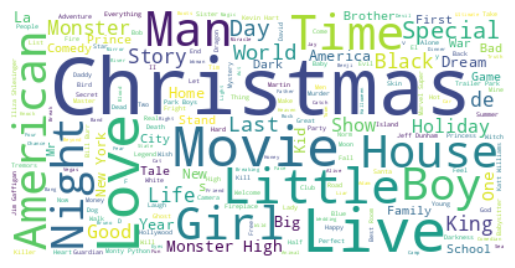

cluster 5


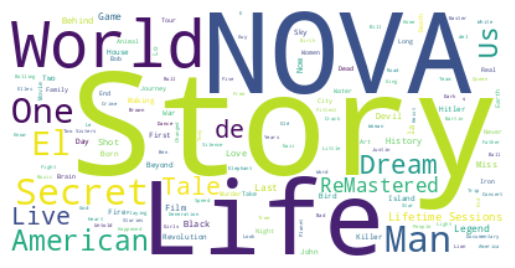

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

## **Hierarchical clustering**

*   Hierarchical clustering is an unsupervised machine learning algorithm used to group similar data points into clusters arranged in a hierarchy, forming a tree-like structure called a dendrogram. This method does not require a predefined number of clusters. Instead, it creates nested clusters that reveal relationships and patterns within the data.

*   There are two main types of hierarchical clustering:

    1. Agglomerative (bottom-up): Starts with each data point as an individual cluster, then iteratively merges the closest clusters based on a distance metric until all points are merged into one cluster or a stopping criterion is met.

    2.  Divisive (top-down): Starts with all data points in a single cluster and recursively splits it into smaller clusters until each point is its own cluster or a stopping condition is met.



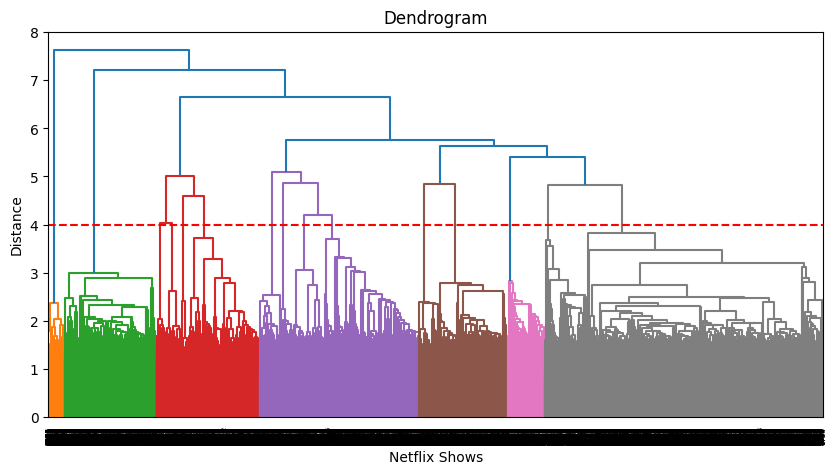

In [ ]:
import scipy.cluster.hierarchy as shc # Import the missing module
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, linkage='ward')
hierarchical.fit_predict(X)

array([1, 0, 1, ..., 2, 1, 2])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                                   title  \
1688    Movie              Deidra & Laney Rob a Train   
4534    Movie                    NOVA: Poisoned Water   
4812    Movie  Pee-wee's Playhouse: Christmas Special   
5154    Movie  ReMastered: Who Killed Jam Master Jay?   
5109  TV Show                            Razia Sultan   

                     director  \
1688          Sydney Freeland   
4534       Llewellyn M. Smith   
4812  Paul Reubens, Wayne Orr   
5154              Brian Oakes   
5109                      NaN   

                                                   cast        country rating  \
1688  Rachel Crow, Ashleigh Murray, Sasheer Zamata, ...  United States  TV-14   
4534                                         Joe Morton  United States  TV-PG   
4812  Paul Reubens, Annette Funicello, Frankie Avalo...  United States  TV-PG   
5154                                                NaN            NaN  TV-MA   
5109  Pankhuri Awasthy, Saurabh Pandey, Rohit Purohi...          India  TV-14   

                                              listed_in  \
1688               Comedies, Dramas, Independent Movies   
4534                                      Documentaries   
4812                                             Movies   
5154                    Documentaries, Music & Musicals   
5109  International TV Shows, Romantic TV Shows, TV ...   

                                            description  hierarchical_cluster  
1688  With their mother in jail and bills piling up,...                     4  
4534  This documentary details how the water disaste...                     2  
4812  Amid an avalanche of stars, Pee-wee straps on ...                     4  
5154  Run-DMC DJ Jam Master Jay made a huge impact i...                     2  
5109  This sweeping historical drama charts the rise...                     5

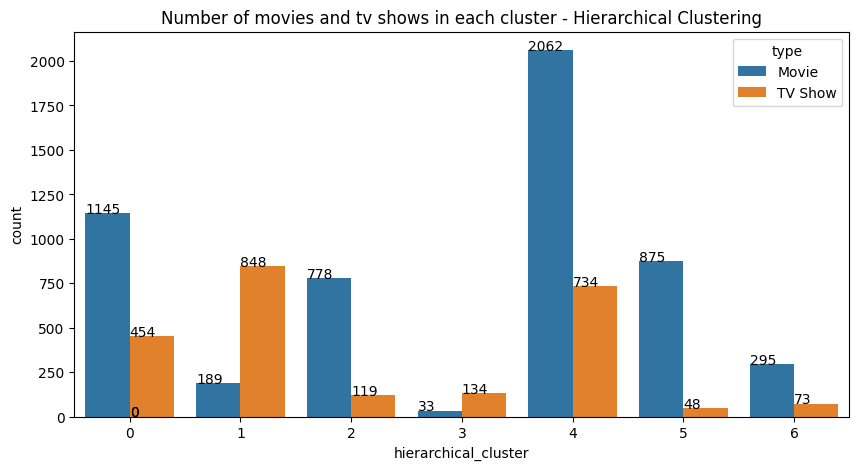

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

#### **Building wordclouds for different clusters in hierarchical Clustering**

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

cluster 0


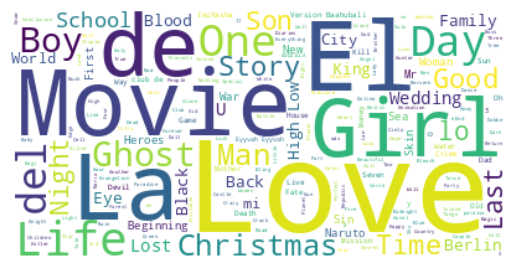

cluster 1


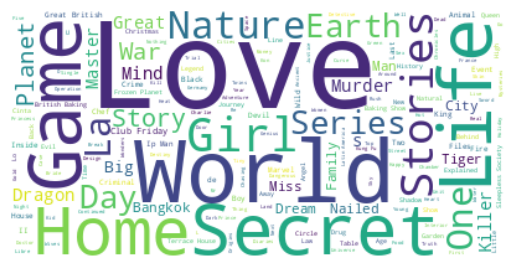

cluster 2


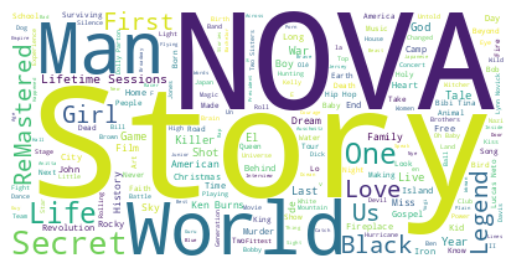

cluster 3


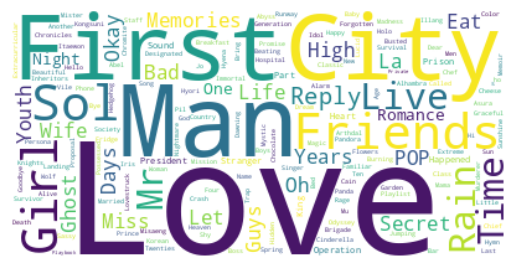

cluster 4


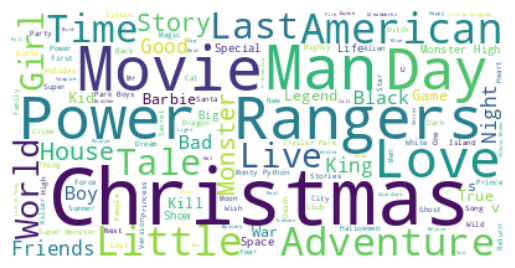

cluster 5


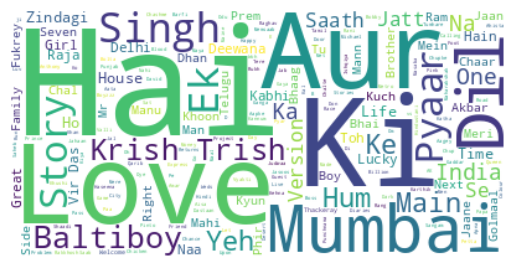

cluster 6


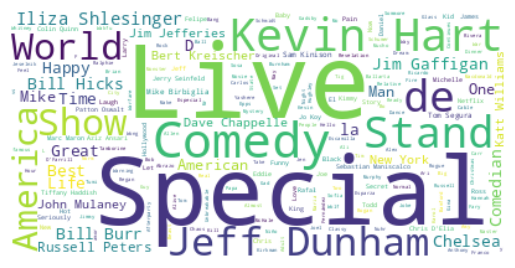

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

## **Recommendation System**

A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

* Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
* The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
* We can use cosine similarity to determine the shows' similarity scores.
* By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.

In [ ]:
# veryfying index
df[['show_id', 'title', 'new_data']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                               new_data  
0     joão miguel bianca comparato michel gome rodol...  
1     jorg michel grau demián bichir héctor bonilla ...  
2     gilbert chan tedd chan stella chung henley hii...  
3     shane acker elijah wood john c reilli jennif c...  
4     robert luket jim sturgess kevin spacey kate bo...  
...                                                 ...  
7782  josef fare imad creidi antoinett turk elia ger...  
7783  mozez singh vicki kaushal sarahjan dia raaghav...  
7784  nasti c tvma documentari intern movi music mus...  
7785  adriano zumbo rachel khoo australia tvpg inter...  
7786  sam dunn unit kingdom canada unit state tvma d...  

[7787 rows x 3 columns]

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'new_data']]


show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                               new_data  
0     joão miguel bianca comparato michel gome rodol...  
1     jorg michel grau demián bichir héctor bonilla ...  
2     gilbert chan tedd chan stella chung henley hii...  
3     shane acker elijah wood john c reilli jennif c...  
4     robert luket jim sturgess kevin spacey kate bo...  
...                                                 ...  
7782  josef fare imad creidi antoinett turk elia ger...  
7783  mozez singh vicki kaushal sarahjan dia raaghav...  
7784  nasti c tvma documentari intern movi music mus...  
7785  adriano zumbo rachel khoo australia tvpg inter...  
7786  sam dunn unit kingdom canada unit state tvma d...  

[7787 rows x 3 columns]

* As shown in the dataframe above, the index was successfully reset. The dataset can now be used to construct a content-based recommendation system.

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zozo'].index[0]}")
print(f"after reset index id for movie 'Zero': {df[recommender_df['title'] == 'Zozo'].index[0]}")

before reset index id for movie 'Zero' : 7782
after reset index id for movie 'Zero': 7782


In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[1.        , 0.07981378, 0.02831842, ..., 0.00718774, 0.02838132,
        0.00501837],
       [0.07981378, 1.        , 0.00674165, ..., 0.06098687, 0.002726  ,
        0.00499014],
       [0.02831842, 0.00674165, 1.        , ..., 0.00805229, 0.00249678,
        0.        ],
       ...,
       [0.00718774, 0.06098687, 0.00805229, ..., 1.        , 0.00325596,
        0.2305175 ],
       [0.02838132, 0.002726  , 0.00249678, ..., 0.00325596, 1.        ,
        0.03235427],
       [0.00501837, 0.00499014, 0.        , ..., 0.2305175 , 0.03235427,
        1.        ]])

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Golmaal: Fun Unlimited')

If you liked 'Golmaal: Fun Unlimited', you may also enjoy: 

Golmaal Returns
Maine Pyaar Kyun Kiya
Himmatwala
Phir Hera Pheri
Kyaa Kool Hain Hum 3
Ishqiya
Ferrari Ki Sawaari
Singham
Chup Chup Ke
The Legend of Michael Mishra


In [ ]:
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Better Call Saul
The Show
Hormones
W/ Bob & David
Furthest Witness
Dear White People
Lovesick
Mitt
The Underclass
Servant of the People


# **CONCLUSION**



*   The project involved addressing a text clustering challenge aimed at categorizing Netflix titles into distinct clusters, ensuring that shows within the same cluster exhibit high similarity, whereas those across different clusters demonstrate dissimilarity. The dataset comprised approximately 7,787 records and included 11 features.


*   Initial stages focused on handling missing data and performing exploratory data analysis, revealing that movies outnumber television shows on Netflix, the content library is expanding exponentially, and the majority of productions originate from the United States. Key attributes selected for clustering were cast, country, genre, director, rating, and description. These textual attributes were processed using the TF-IDF vectorization technique, resulting in a feature set of around 10,000 dimensions.

To mitigate the high dimensionality issue, Principal Component Analysis (PCA) was employed, reducing the feature space to 3,000 components while retaining over 80% of the data variance. Subsequently, the K-Means clustering algorithm was applied, with model evaluation methods such as the elbow criterion and Silhouette analysis indicating an optimal cluster count of six. Additionally, Agglomerative hierarchical clustering was utilized, where dendrogram analysis suggested seven as the appropriate number of clusters.

Finally, a content-based recommendation system was developed, leveraging a cosine similarity matrix to provide personalized suggestions. Users receive ten recommendations based on their viewed titles, enhancing content discovery and user experience. This study integrates advanced text preprocessing, dimensionality reduction, and clustering methodologies to effectively organize and recommend streaming content.


*   To mitigate the high dimensionality issue, Principal Component Analysis (PCA) was employed, reducing the feature space to 3,000 components while retaining over 80% of the data variance. Subsequently, the K-Means clustering algorithm was applied, with model evaluation methods such as the elbow criterion and Silhouette analysis indicating an optimal cluster count of six. Additionally, Agglomerative hierarchical clustering was utilized, where dendrogram analysis suggested seven as the appropriate number of clusters.


*   Finally, a content-based recommendation system was developed, leveraging a cosine similarity matrix to provide personalized suggestions. Users receive ten recommendations based on their viewed titles, enhancing content discovery and user experience. This study integrates advanced text preprocessing, dimensionality reduction, and clustering methodologies to effectively organize and recommend streaming content.






# ***# Success!... The Machine Learning Capstone Project is now complete!***

# ***# I am proud to announce the successful completion of our Machine Learning Capstone Project!***
